In [79]:
# Leitura do CSV
import pandas as pd
import numpy as np

In [80]:
df = pd.read_csv('training_dataset.csv')
df.drop(['Unnamed: 0'], axis = 'columns', inplace = True)
df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre,has_genre,genres_list,genre_string
0,2wAfHM7Whz67VFbdanhZlk,Nobody Knows You When You're Down and Out,41,177133,0,['Bessie Smith'],"[""'5ESobCkc6JI4tIMxQttqeg'""]",1923,0.614,0.0423,...,0.996,0.002930,0.183,0.211,89.822,4,['jazz'],True,False,jazz
1,2AZgaYZSwUosJD71J2N2Zo,'Tain't Nobody's Bizness If I Do,30,206600,0,['Bessie Smith'],"[""'5ESobCkc6JI4tIMxQttqeg'""]",1923,0.537,0.0443,...,0.996,0.000265,0.152,0.137,80.468,4,['jazz'],True,False,jazz
2,7lRFR5GJCxK87ZbVMtQSeS,Ain't Misbehavin',28,192600,0,['Louis Armstrong'],"[""'19eLuQmk9aCobbVDHc6eek'""]",1923,0.665,0.2540,...,0.976,0.002170,0.644,0.503,125.734,4,['jazz'],True,False,jazz
3,6XTvSCqGLLH0vzQQRn55hz,"Empty Bed Blues, Pt. 1",27,181173,0,['Bessie Smith'],"[""'5ESobCkc6JI4tIMxQttqeg'""]",1923,0.709,0.0620,...,0.995,0.003410,0.120,0.553,85.854,4,['jazz'],True,False,jazz
4,6qRvnXftofjYJm1Mg98UWL,Need a Little Sugar in My Bowl,27,167640,0,['Bessie Smith'],"[""'5ESobCkc6JI4tIMxQttqeg'""]",1923,0.693,0.0270,...,0.992,0.000000,0.134,0.402,75.749,4,['jazz'],True,False,jazz


In [81]:
from sklearn.compose import make_column_transformer
#from sklearn.compose import ColumnTransformer
from keras.models import Sequential
from keras.layers import Dense
#from keras.utils import np_utils
#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import KFold
#from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from tensorflow.keras import callbacks
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
#from sklearn.model_selection import train_test_split
from fast_ml.model_development import train_valid_test_split

In [82]:
X = df.copy().dropna()
filtro = X['popularity'] > 0
X = X[filtro]
X = X[['danceability', 'energy', 'key', 'loudness', 'mode',
                    'speechiness', 'instrumentalness',
                    'liveness', 'valence', 'tempo', 'duration_ms' ,'popularity']]
X['popularity'].min()

1

In [83]:
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(X, target = 'popularity',
                                                                            train_size=0.8, valid_size=0.1, test_size=0.1)

In [84]:
features_num = ['danceability', 'energy', 'key', 'loudness', 'mode',
                       'speechiness', 'instrumentalness',
                    'liveness', 'valence', 'tempo', 'duration_ms']

In [85]:
preprocessor = make_column_transformer(
   (MinMaxScaler(), features_num)
)

In [86]:
preprocessor_y = make_column_transformer(
        (MinMaxScaler(),['popularity'])
)

In [87]:
X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)
y_train = y_train / 100 # popularity is on a scale 0-100, so this rescales to 0-1.
y_valid = y_valid / 100
y_test = y_test / 100
X_test = preprocessor.transform(X_test)

In [88]:
input_shape = [X_train.shape[1]]

In [89]:
early_stopping = callbacks.EarlyStopping(min_delta=0.001,
                                            patience= 5,
                                            restore_best_weights=True)

In [92]:
model = keras.Sequential([
layers.Dense(45, activation='relu', input_shape=input_shape),
layers.Dropout(0.15),
layers.BatchNormalization(),
layers.Dense(23, activation='relu'),
layers.Dropout(0.15),
layers.BatchNormalization(),
layers.Dense(9, activation='relu'),
layers.Dropout(0.15),
layers.BatchNormalization(),
layers.Dense(1, activation = 'sigmoid')
])

model.compile(
        optimizer='adam',
        loss='mae',
        metrics='accuracy'
)

In [93]:
history = model.fit(
        X_train, y_train,
       validation_data=(X_valid, y_valid),
        batch_size=64,
        epochs=100,
        callbacks=[early_stopping]
)

Epoch 1/100
4267/4267 [==============================] - 10s 2ms/step - loss: 0.1370 - accuracy: 0.0000e+00 - val_loss: 0.1253 - val_accuracy: 0.0000e+00
Epoch 2/100
4267/4267 [==============================] - 8s 2ms/step - loss: 0.1259 - accuracy: 0.0000e+00 - val_loss: 0.1228 - val_accuracy: 0.0000e+00
Epoch 3/100
4267/4267 [==============================] - 8s 2ms/step - loss: 0.1246 - accuracy: 0.0000e+00 - val_loss: 0.1227 - val_accuracy: 0.0000e+00
Epoch 4/100
4267/4267 [==============================] - 8s 2ms/step - loss: 0.1241 - accuracy: 0.0000e+00 - val_loss: 0.1226 - val_accuracy: 0.0000e+00
Epoch 5/100
4267/4267 [==============================] - 8s 2ms/step - loss: 0.1237 - accuracy: 0.0000e+00 - val_loss: 0.1216 - val_accuracy: 0.0000e+00
Epoch 6/100
4267/4267 [==============================] - 8s 2ms/step - loss: 0.1235 - accuracy: 0.0000e+00 - val_loss: 0.1214 - val_accuracy: 0.0000e+00
Epoch 7/100
4267/4267 [==============================] - 8s 2ms/step - loss: 0.12

Minimum Validation Loss: 0.1209


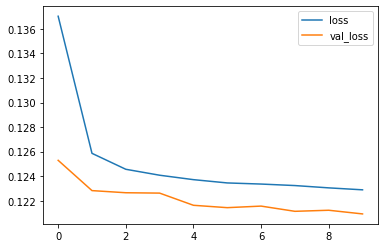

In [94]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()))

In [95]:
resultado = model.predict(X_test)
resultado = resultado * 100
esperado = y_test * 100
teste = pd.DataFrame(resultado,esperado)
teste.head(20)

1067/1067 [==============================] - 1s 854us/step


,0
popularity,
9.0,21.108290
42.0,36.035378
14.0,18.108881
11.0,25.192457
10.0,19.985039
24.0,29.090214
35.0,32.491699
22.0,38.112724
6.0,23.859915


In [96]:
import spotipy
import csv
import sys
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy import oauth2

In [97]:
client_id = 'ddf5739029b0474587bc3f845f7220a0'
client_secret = '83758fd8a9974ea0ae9e3689e9803c8e'

In [98]:
username ='12166356598'
scope = 'playlist-read-private'
redirect_uri = 'http://localhost:9001/callback'
playlist = '2ISRFOh87p6vEnCfj2EKpa'


token = util.prompt_for_user_token(username,
                                   scope,
                                   client_id,   
                                   client_secret,     
                                   redirect_uri)

In [99]:
def analyze_playlist(creator, playlist_id):
    
    # Create empty dataframe
    playlist_features_list = ["artist","album","track_name",  "track_id","danceability","energy","key","loudness","mode", "speechiness","instrumentalness","liveness","valence","tempo", "duration_ms","time_signature"]
    
    playlist_df = pd.DataFrame(columns = playlist_features_list)
    
    # Loop through every track in the playlist, extract features and append the features to the playlist df
    
    playlist = sp.user_playlist_tracks(creator, playlist_id)["items"]
    for track in playlist:
        # Create empty dict
        playlist_features = {}
        # Get metadata
        playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
        playlist_features["album"] = track["track"]["album"]["name"]
        playlist_features["track_name"] = track["track"]["name"]
        playlist_features["track_id"] = track["track"]["id"]
        
        # Get audio features
        audio_features = sp.audio_features(playlist_features["track_id"])[0]
        for feature in playlist_features_list[4:]:
            playlist_features[feature] = audio_features[feature]
        
        # Concat the dfs
        track_df = pd.DataFrame(playlist_features, index = [0])
        playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)
        
    return playlist_df

In [100]:
if token:
    sp = spotipy.Spotify(auth = token)  
    playlist = analyze_playlist(username,playlist)
playlist.head(10)

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Post Malone,Hollywood's Bleeding,Circles,21jGcNKet2qwijlDFuPiPb,0.695,0.762,0,-3.497,1,0.0395,0.002440,0.0863,0.553,120.042,215280,4
1,Vitão,Complicado,Complicado,52vPpP2gEYaBROIS77J38P,0.734,0.484,7,-7.486,0,0.1300,0.000000,0.2240,0.499,130.050,179339,4
2,Post Malone,Hollywood's Bleeding,Goodbyes (feat. Young Thug),0t3ZvGKlmYmVsDzBJAXK8C,0.548,0.653,5,-3.875,1,0.0810,0.000000,0.1030,0.163,150.068,174853,4
3,Gusttavo Lima,O Embaixador in Cariri (Ao Vivo),A Gente Fez Amor - Ao Vivo,3tv697PZNnaQN0Mn2zGhS5,0.794,0.937,8,-2.440,0,0.0336,0.000004,0.9620,0.826,134.012,237517,4
4,Luan Santana,VIVA (Ao Vivo),choque térmico - ao vivo,159ntSAEWJ9zIMOSXmQ530,0.737,0.758,2,-5.508,1,0.0402,0.000000,0.8340,0.734,126.978,180001,4
5,Marília Mendonça,Graveto (Ao Vivo),Graveto - Ao Vivo,3tc8Z4lGzOIwmIVftsxO6o,0.714,0.632,9,-5.100,1,0.0312,0.000000,0.8120,0.402,93.052,170877,4
6,Gustavo Mioto,Plaquinha de Aviso (Ao Vivo),Plaquinha de Aviso - Ao Vivo,2vdY4HzOTDkgHPlzgOVsdE,0.589,0.915,9,-2.663,0,0.2340,0.000000,0.7580,0.634,134.989,185205,4
7,Avine Vinny,Maturidade (feat. Matheus & Kauan),Maturidade (feat. Matheus & Kauan),3QkKCTSHnJlUag0GG9F1cN,0.604,0.726,7,-8.577,0,0.0494,0.000000,0.9050,0.782,148.007,194240,4
8,Alok,Vale Vale,Vale Vale,3bTjd1iQJvsfIoH8v7A0Gy,0.475,0.896,1,-5.696,0,0.0765,0.073400,0.4290,0.305,133.998,193433,4
9,Post Malone,Hollywood's Bleeding,Wow.,7xQAfvXzm3AkraOtGPWIZg,0.829,0.539,11,-7.359,0,0.2080,0.000002,0.1030,0.388,99.960,149547,4


In [101]:
playlist.drop(['time_signature'], axis = 'columns', inplace = True)

In [102]:
playlist.dtypes

artist               object
album                object
track_name           object
track_id             object
danceability        float64
energy              float64
key                  object
loudness            float64
mode                 object
speechiness         float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms          object
dtype: object

In [103]:
new_X = playlist[['danceability', 'energy', 'key', 'loudness', 'mode',
                       'speechiness', 'instrumentalness',
                    'liveness', 'valence', 'tempo', 'duration_ms']]

In [104]:
new_X['key'] = new_X['key'].astype(float)
new_X['mode'] = new_X['mode'].astype(float)
new_X['duration_ms'] = new_X['duration_ms'].astype(float)

In [105]:
new_X.dtypes

danceability        float64
energy              float64
key                 float64
loudness            float64
mode                float64
speechiness         float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms         float64
dtype: object

In [106]:
scaler = MinMaxScaler()
# Fit the scaler to the data
scaler.fit(new_X)

# Transform the data to the scaled range
X_scaler = scaler.transform(new_X)

In [107]:
predictions = model.predict(X_scaler)
predictions = predictions * 100

3/3 [==============================] - 0s 2ms/step


In [108]:
playlist['predictions'] = predictions
playlist[['track_name','predictions']]

,track_name,predictions
0,Circles,27.670761
1,Complicado,27.627214
2,Goodbyes (feat. Young Thug),29.033508
3,A Gente Fez Amor - Ao Vivo,27.974400
4,choque térmico - ao vivo,28.643986
...,...,...
61,MTG É Sempre Assim,25.245699
62,SORRIA,27.710354
63,Se Essa Bunda,27.209547
64,MORENA,29.149717
